In [1]:
#1. Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# 2. Read the data as a data frame
df1= pd.read_csv('download-7.csv')
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#3.a -Shape of the data
df1.shape

(1338, 7)

In [4]:
#3.b- Data type of each attribute
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#3.c - Checking the presence of missing values
df1.isna().sum()
#No missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#3.d- 5 point summary of numerical attributes
df1.describe().transpose()
# Age, BMI, Children appear to have a normal distribution

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


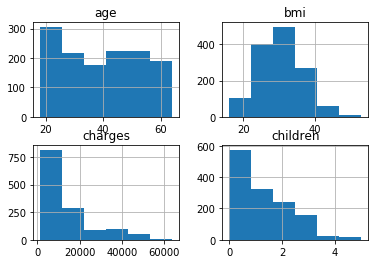

In [7]:
#3.e- Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
hist=df1.hist(bins=6)

In [8]:
#3.f- Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
print(df1['bmi'].skew())
print(df1['age'].skew())
print(df1['charges'].skew())

#bmi is slightly right skewed
# age is close to symmetric
# charges are highly right skewed-positive skewed

0.2840471105987448
0.05567251565299186
1.5158796580240388


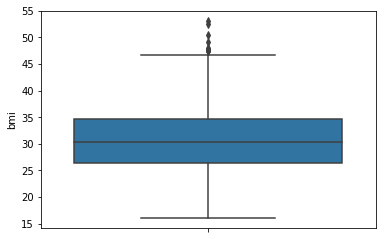

In [9]:
#3.g- g. Checking the presence of outliers in ‘bmi’, ‘age’ and‘charges columns

bmi=sns.boxplot(y='bmi',data=df1)


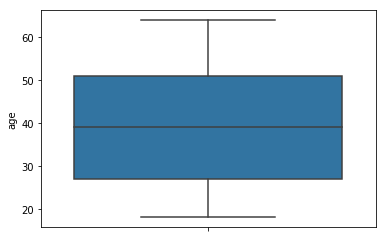

In [10]:
age=sns.boxplot(y='age', data=df1)

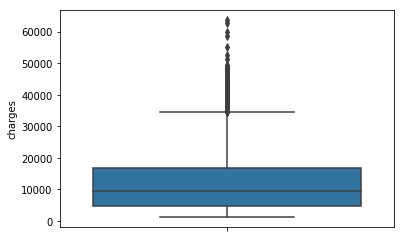

In [11]:
age=sns.boxplot(y='charges', data=df1)

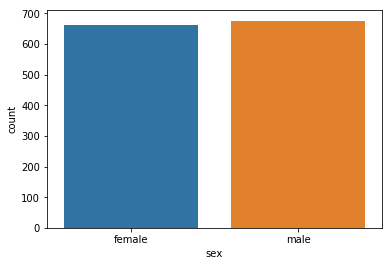

In [12]:
#3.h- Distribution of categorical columns (include children)

sex = sns.countplot(x="sex",data=df1)

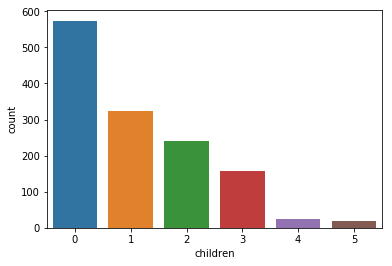

In [13]:
children=sns.countplot(x='children', data=df1)

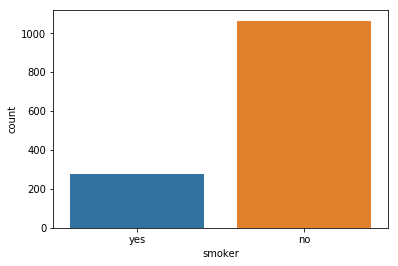

In [14]:
smoker=sns.countplot(x='smoker', data=df1)

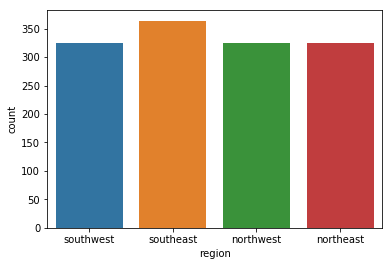

In [15]:
region=sns.countplot(x='region', data=df1)

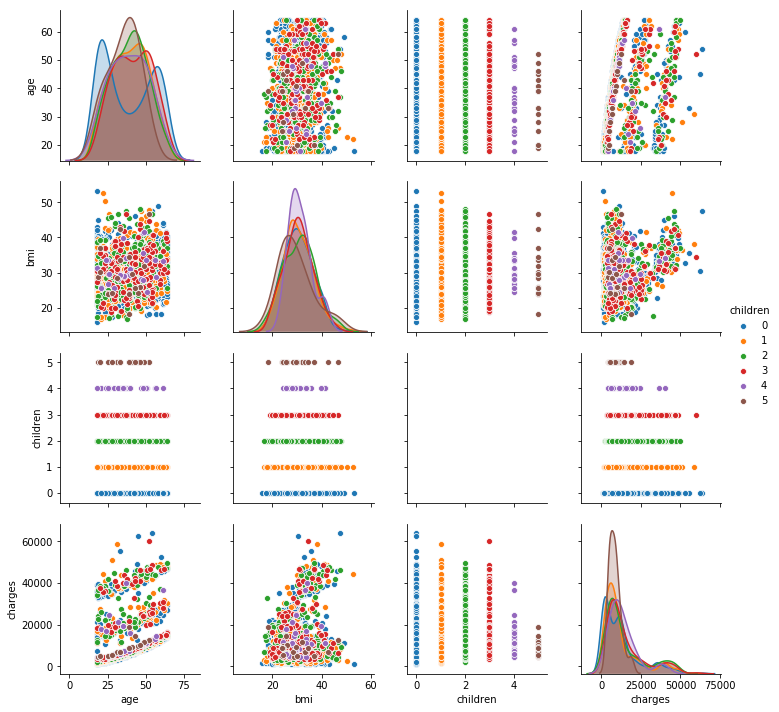

In [25]:
sns.pairplot(df1,hue='children')

In [17]:
#4.a- a. Do charges of people who smoke differ significantly from the people who don't?


In [18]:
#We use a two sample independent T-test. 
#Null Hypothesis is : There is no Significant difference between the BMI of Males and Females
#We select a significance level of 5%

from scipy.stats import ttest_ind
df2=df1[['smoker', 'charges']]

df3=df2[df2['smoker']=='yes']
smoker_yes=df3.drop('smoker',axis=1)

df4=df2[df2['smoker']=='no']
smoker_no=df4.drop('smoker', axis=1)
stats.ttest_ind(smoker_yes,smoker_no)

# since the pvalue < 0.05 we  Reject the Null Hypothesis 
# We can conclude that there is  significant difference in the Charges between Smokers and Non Smokers



Ttest_indResult(statistic=array([46.66492117]), pvalue=array([8.27143584e-283]))

In [19]:
#4.b- Does bmi of males differ significantly from that of females?

In [20]:
#We use a two sample independent T-test. 
#Null Hypothesis is : There is no Significant difference between the BMI of Males and Females
#We select a significance level of 5%

from scipy.stats import ttest_ind
df2=df1[['sex', 'bmi']]

df3=df2[df2['sex']=='male']
male_bmi=df3.drop('sex',axis=1)

df4=df2[df2['sex']=='female']
female_bmi=df4.drop('sex', axis=1)
stats.ttest_ind(male_bmi,female_bmi)

# since the pvalue > 0.05 we Fail to Reject the Null Hypothesis and Accept the null Hypothesis
# We can conclude that there is no significant difference in the BMI between Males and Females


Ttest_indResult(statistic=array([1.69675264]), pvalue=array([0.08997637]))

In [21]:
#4.c- . Is the proportion of smokers significantly different in different genders?

In [22]:
import numpy as np
# Test the Hypothesis that there is no Significant difference in proportion of smokers in different genders
# Null Hypothesis : Proportion of Smokers and Non-Smokers among Male and Female Population is Equal
df2=df1[['sex', 'smoker']]

df3=df2[df2['sex']=='male']
df3['smoker'].value_counts()
df4=[159,517] # proportion of 'Male' Smokers = 159, Non-smoker 517

df5=df2[df2['sex']=='female']
df5['smoker'].value_counts()
df6=[115,547] # proportion of 'Male' Smokers = 159, Non-smoker 517

df7=[df4,df6]
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(df7)

print((chi_sq_Stat, p_value,deg_freedom))
# at 0.05 level of significance we can Reject the Null Hypothesis, since 0.006< 0.05. 
#We can conclude that there is significant difference in the proportion of smokers in the male and female population


(7.3929108145999605, 0.006548143503580674, 1)


In [23]:
#4.d- Is the distribution of bmi across women with no children, one child and two children, the same ?
#Null Hypothesis is that the Sample Mean BMI for Women with No Children, One Child and Two Children are the Same
#Alternate HYpotheis is that the Sample Mean BMI are different
# We will use the ANOVA for testing this hypothesis

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

df2=df1[['sex','children','bmi']]
df3= df2[df2['children']<=2]
df3['children'] = pd.Categorical(df3['children'])
df4=df3[df3['sex']=='female'].drop('sex', axis=1)
df4.head()
df4['children'].value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

In [24]:
formula = 'bmi ~ C(children)'
model = ols(formula, df4).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


The F value is small, reflecting that the between group variance is small compared to within group variability. 
This indicates that there is greated likelohood of the means being closer to each other.
Hence we Fail to Reject the Null Hypothesis.